<a href="https://colab.research.google.com/github/Nivyarajeesh/machine-learning--project/blob/main/DIABETES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix






**Load Dataset**

In [26]:
data = pd.read_csv('/archive (4).zip')

In [27]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#bmi = BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk

#HbA1c_level = HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.

In [28]:
# number of rows and Columns in this dataset
data.shape

(100000, 9)

In [29]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [30]:
#Checking for duplicate rows in the dataframe
print(len(data[data.duplicated()]))

3854


In [31]:
#Identify duplicates
duplicates = data.duplicated()
# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Display the duplicate rows
print(data[duplicates])

Number of duplicate rows: 3854
       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6

In [32]:
# Remove duplicate rows from the entire DataFrame
df = data.drop_duplicates()

# Display the cleaned DataFrame
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [33]:
#Checking for duplicate rows in the dataframe
print(len(df[df.duplicated()]))

0


In [34]:
df.shape

(96146, 9)

**Label encoding**

In [35]:
#checking the categorical values
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

['gender', 'smoking_history']

In [36]:
#converting the categorical values into numerical values using LabelEncoder.
label_encoder = LabelEncoder()

df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
df['gender'] = label_encoder.fit_transform(df['gender'])

df.head()

<ipython-input-36-cf5981273561>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
<ipython-input-36-cf5981273561>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = label_encoder.fit_transform(df['gender'])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [37]:
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

***Standardize and Normalize***

In [38]:


#  Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

#  Normalize the standardized data
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(standardized_data)



In [39]:


# Convert normalized features back to DataFrame for easier handling
new_data = pd.DataFrame(normalized_data, columns=df.columns)

new_data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0.0,1.0,0.8,0.177171,0.563636,0.272727,0.0
1,0.0,0.674675,0.0,0.0,0.0,0.202031,0.563636,0.000000,0.0
2,0.5,0.349349,0.0,0.0,0.8,0.202031,0.400000,0.354545,0.0
3,0.0,0.449449,0.0,0.0,0.2,0.156863,0.272727,0.340909,0.0
4,0.5,0.949950,1.0,1.0,0.2,0.118231,0.236364,0.340909,0.0


**Skew**

In [40]:
skewness = new_data.skew()
print("Skewness of the data:")
print(skewness)

Skewness of the data:
gender                 0.345257
age                   -0.062445
hypertension           3.157676
heart_disease          4.642359
smoking_history       -0.082550
bmi                    1.023751
HbA1c_level           -0.054463
blood_glucose_level    0.836489
diabetes               2.903845
dtype: float64


Near Symmetric Distributions:Age, HbA1c level, and smoking history

Moderate Positive Skewness: Gender, BMI, and blood glucose level

Positive Skewness: Hypertension, heart disease, and diabetes



In [41]:
#Assign the independent columns into x
X = new_data.drop(columns=['diabetes'], axis=1)


In [42]:
#Assign the target value into y
Y = new_data['diabetes']

In [43]:
Y.value_counts()

diabetes
0.0    87664
1.0     8482
Name: count, dtype: int64

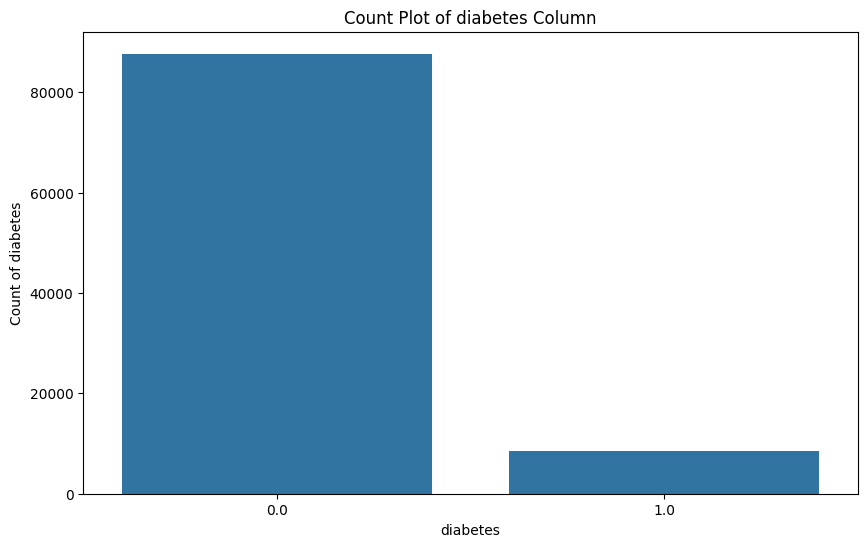

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data = new_data,x='diabetes')
plt.title('Count Plot of diabetes Column')
plt.xlabel('diabetes')
plt.ylabel('Count of diabetes')
plt.show()

***Correlation***

Head of correlation_data:
   diabetes  gender       age  hypertension  heart_disease  smoking_history  \
0       0.0     0.0  1.000000           0.0            1.0              0.8   
1       0.0     0.0  0.674675           0.0            0.0              0.0   
2       0.0     0.5  0.349349           0.0            0.0              0.8   
3       0.0     0.0  0.449449           0.0            0.0              0.2   
4       0.0     0.5  0.949950           1.0            1.0              0.2   

        bmi  HbA1c_level  blood_glucose_level  
0  0.177171     0.563636             0.272727  
1  0.202031     0.563636             0.000000  
2  0.202031     0.400000             0.354545  
3  0.156863     0.272727             0.340909  
4  0.118231     0.236364             0.340909  


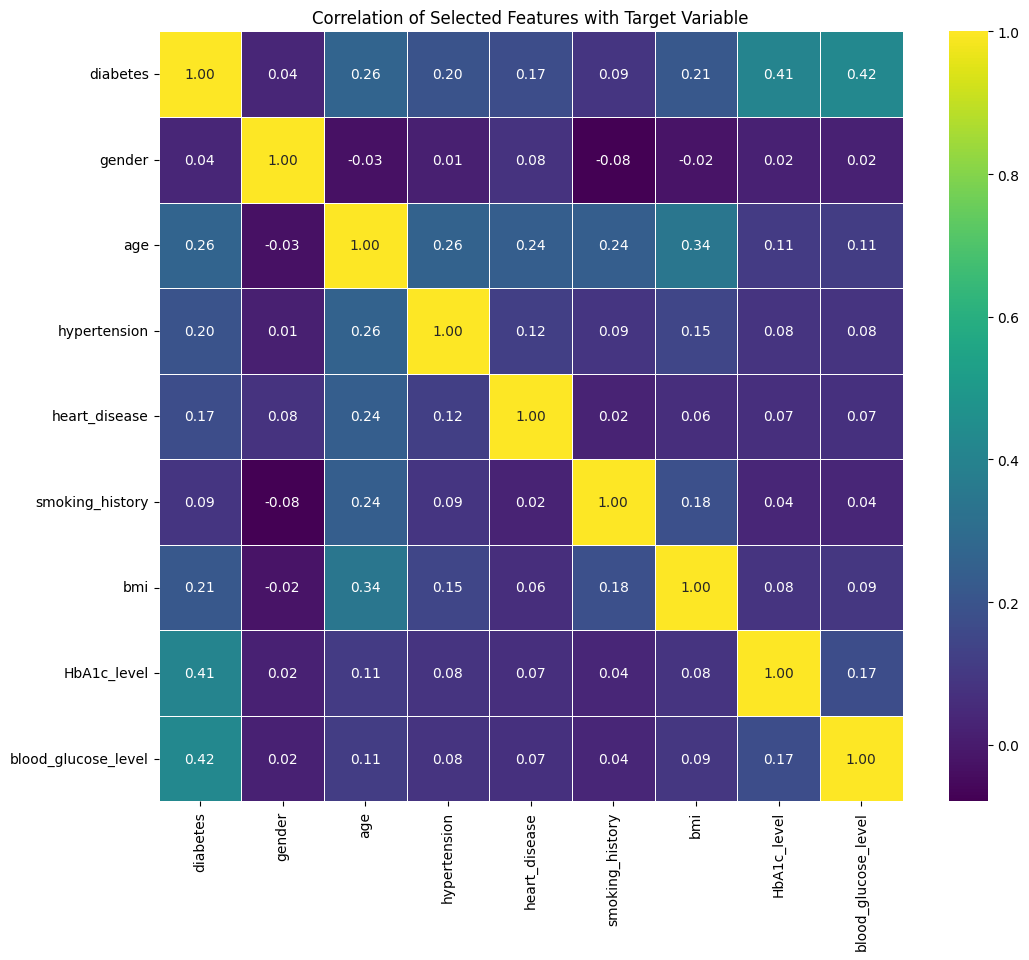

In [45]:
# Combine the target variable and selected features into one DataFrame
correlation_data = pd.concat([Y,X], axis=1)

print("Head of correlation_data:")
print(correlation_data.head())

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Selected Features with Target Variable')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Check the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (76916, 8)
Shape of X_test: (19230, 8)
Shape of y_train: (76916,)
Shape of y_test: (19230,)


**Random Forest**

In [47]:
# Assuming X and Y are already defined and preprocessed
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model with all selected features
rf_model.fit(X_train, y_train)

# Predict responses based on all features
predictions = rf_model.predict(X_test)

# Combine all features and prediction results into a DataFrame for easy analysis
prediction_df = pd.DataFrame({
    'predicted_response': predictions,
    'actual_response': y_test
})

# Display the DataFrame
print("Predicted and Actual Response DataFrame:")
print(prediction_df.head())

# Evaluate the accuracy of predictions based on all features
accuracy = accuracy_score(prediction_df['actual_response'], prediction_df['predicted_response'])
print(f'Overall Prediction Accuracy: {accuracy}')

# Print classification report
print('Classification Report for Overall Prediction:')
print(classification_report(prediction_df['actual_response'], prediction_df['predicted_response']))

# Print confusion matrix
conf_matrix = confusion_matrix(prediction_df['actual_response'], prediction_df['predicted_response'])
print('Confusion Matrix for Overall Prediction:')
print(conf_matrix)



Predicted and Actual Response DataFrame:
       predicted_response  actual_response
2547                  0.0              0.0
34242                 0.0              0.0
69022                 1.0              1.0
49536                 0.0              0.0
78171                 0.0              0.0
Overall Prediction Accuracy: 0.9686427457098284
Classification Report for Overall Prediction:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     17509
         1.0       0.94      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230

Confusion Matrix for Overall Prediction:
[[17437    72]
 [  531  1190]]


**SVC**

In [48]:
# Assuming X and Y are already defined and preprocessed
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Train the model with all selected features
svm_model.fit(X_train, y_train)

# Predict responses based on all features
predictions = svm_model.predict(X_test)

# Combine all features and prediction results into a DataFrame for easy analysis
prediction_df = pd.DataFrame({
    'predicted_response': predictions,
    'actual_response': y_test
})

# Display the DataFrame
print("Predicted and Actual Response DataFrame:")
print(prediction_df.head())

# Evaluate the accuracy of predictions based on all features
accuracy = accuracy_score(prediction_df['actual_response'], prediction_df['predicted_response'])
print(f'Overall Prediction Accuracy: {accuracy}')

# Print classification report
print('Classification Report for Overall Prediction:')
print(classification_report(prediction_df['actual_response'], prediction_df['predicted_response']))

# Print confusion matrix
conf_matrix = confusion_matrix(prediction_df['actual_response'], prediction_df['predicted_response'])
print('Confusion Matrix for Overall Prediction:')
print(conf_matrix)



Predicted and Actual Response DataFrame:
       predicted_response  actual_response
2547                  0.0              0.0
34242                 0.0              0.0
69022                 1.0              1.0
49536                 0.0              0.0
78171                 0.0              0.0
Overall Prediction Accuracy: 0.9605304212168487
Classification Report for Overall Prediction:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     17509
         1.0       0.98      0.57      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.97      0.79      0.85     19230
weighted avg       0.96      0.96      0.96     19230

Confusion Matrix for Overall Prediction:
[[17487    22]
 [  737   984]]


**Naive Bayes**

In [49]:
# Assuming X and Y are already defined and preprocessed
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model with all selected features
nb_model.fit(X_train, y_train)

# Predict responses based on all features
predictions = nb_model.predict(X_test)

# Combine all features and prediction results into a DataFrame for easy analysis
prediction_df = pd.DataFrame({
    'predicted_response': predictions,
    'actual_response': y_test
})

# Display the DataFrame
print("Predicted and Actual Response DataFrame:")
print(prediction_df.head())

# Evaluate the accuracy of predictions based on all features
accuracy = accuracy_score(prediction_df['actual_response'], prediction_df['predicted_response'])
print(f'Overall Prediction Accuracy: {accuracy}')

# Print classification report
print('Classification Report for Overall Prediction:')
print(classification_report(prediction_df['actual_response'], prediction_df['predicted_response']))

# Print confusion matrix
conf_matrix = confusion_matrix(prediction_df['actual_response'], prediction_df['predicted_response'])
print('Confusion Matrix for Overall Prediction:')
print(conf_matrix)

Predicted and Actual Response DataFrame:
       predicted_response  actual_response
2547                  0.0              0.0
34242                 0.0              0.0
69022                 1.0              1.0
49536                 0.0              0.0
78171                 0.0              0.0
Overall Prediction Accuracy: 0.8977119084763391
Classification Report for Overall Prediction:
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94     17509
         1.0       0.45      0.64      0.53      1721

    accuracy                           0.90     19230
   macro avg       0.71      0.78      0.73     19230
weighted avg       0.92      0.90      0.91     19230

Confusion Matrix for Overall Prediction:
[[16170  1339]
 [  628  1093]]
